In [15]:
import numpy as np 
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text
import string
from collections import Counter
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import time
import random
import gc
import sys
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix
import scipy.sparse as sp
from itertools import permutations
import seaborn as sns
import itertools
import matplotlib as mpl

# Create Data  

In [16]:
# parameters 
N = 30
p = 0.2
H = 300
TOTAL_NUMBER_WORDS = N**2 
TOTAL_NUMBER_SEN =  2000 
start_x = int(N/2)
start_y = 0
end_x = start_x
end_y = N-1 
cur_randomness = 0

In [17]:
np.random.seed(0)

In [18]:
# data structures
VOCABULARY = list(itertools.product(list(range(N)), repeat=2)) # all states
VOCABULARY_MAP = dict((y,x) for x,y in enumerate(VOCABULARY))  # map each state to a scalar 
TOTAL_NUMBER_WORDS = len(VOCABULARY) 
randomness = np.random.binomial(1, p, 100000000)        # for computational reasons, all randomness is chosen here 

In [19]:
def limit(x):
    if x >= N: return N-1
    if x<0: return 0 
    return x

In [20]:
def go_up(x, y, mid, cur_randomness, verbose = False):
    # with some probability go further then mid 
    if randomness[cur_randomness]:
        if verbose:
            print('noisy up')
        x = x + (x>=mid) - (x<mid)
    else:
        y += 1
    cur_randomness+=1
    return limit(x),limit(y), cur_randomness

In [21]:
def go_right(x, y, cur_randomness, verbose = False):
    # with some probability go further then mid 
    if randomness[cur_randomness]:
        if verbose:
            print('noisy right')
        x = x - 1
    else: 
        x = x + 1
    cur_randomness+=1
    return limit(x),limit(y), cur_randomness

In [22]:
def go_left(x, y, cur_randomness, verbose = False):
    # with some probability go further than mid 
    if randomness[cur_randomness]:
        if verbose:
            print('noisy left')
        x = x + 1
    else:
        x = x - 1
    cur_randomness+=1    
    return limit(x),limit(y), cur_randomness

In [23]:
def create_data(start_x, start_y, end_x, end_y, cur_randomness):
    # start_x, start_y: initial state 
    # end_x, end_y: goal state 
    data = np.zeros((N, N)) # number of visits in each state 
    ALL_SEN = np.empty(TOTAL_NUMBER_SEN, dtype=list)

    for i in range(TOTAL_NUMBER_SEN):
        print("%d/%d" % (i, TOTAL_NUMBER_SEN))
        ALL_SEN[i] = []
        t = 0 
        cur_x = start_x
        cur_y = start_y
        data[cur_x, cur_y] += 1
        ALL_SEN[i].append(VOCABULARY_MAP[(cur_x,cur_y)])
        while (cur_x != end_x or cur_y != end_y) and t < H-1:
            t+=1
            if cur_y < end_y:
                cur_x, cur_y, cur_randomness = go_up(cur_x,cur_y,start_x, cur_randomness)
            else:
                if cur_x < end_x-1:
                    cur_x, cur_y, cur_randomness = go_right(cur_x,cur_y, cur_randomness)
                else:
                    cur_x, cur_y, cur_randomness = go_left(cur_x,cur_y, cur_randomness)
            data[cur_x, cur_y] += 1
            ALL_SEN[i].append(VOCABULARY_MAP[(cur_x,cur_y)])
    return data, ALL_SEN, cur_randomness

In [24]:
data, ALL_SEN, cur_randomness = create_data(start_x, start_y, end_x, end_y, cur_randomness)

0/2000
1/2000
2/2000
3/2000
4/2000
5/2000
6/2000
7/2000
8/2000
9/2000
10/2000
11/2000
12/2000
13/2000
14/2000
15/2000
16/2000
17/2000
18/2000
19/2000
20/2000
21/2000
22/2000
23/2000
24/2000
25/2000
26/2000
27/2000
28/2000
29/2000
30/2000
31/2000
32/2000
33/2000
34/2000
35/2000
36/2000
37/2000
38/2000
39/2000
40/2000
41/2000
42/2000
43/2000
44/2000
45/2000
46/2000
47/2000
48/2000
49/2000
50/2000
51/2000
52/2000
53/2000
54/2000
55/2000
56/2000
57/2000
58/2000
59/2000
60/2000
61/2000
62/2000
63/2000
64/2000
65/2000
66/2000
67/2000
68/2000
69/2000
70/2000
71/2000
72/2000
73/2000
74/2000
75/2000
76/2000
77/2000
78/2000
79/2000
80/2000
81/2000
82/2000
83/2000
84/2000
85/2000
86/2000
87/2000
88/2000
89/2000
90/2000
91/2000
92/2000
93/2000
94/2000
95/2000
96/2000
97/2000
98/2000
99/2000
100/2000
101/2000
102/2000
103/2000
104/2000
105/2000
106/2000
107/2000
108/2000
109/2000
110/2000
111/2000
112/2000
113/2000
114/2000
115/2000
116/2000
117/2000
118/2000
119/2000
120/2000
121/2000
122/2000
123

1625/2000
1626/2000
1627/2000
1628/2000
1629/2000
1630/2000
1631/2000
1632/2000
1633/2000
1634/2000
1635/2000
1636/2000
1637/2000
1638/2000
1639/2000
1640/2000
1641/2000
1642/2000
1643/2000
1644/2000
1645/2000
1646/2000
1647/2000
1648/2000
1649/2000
1650/2000
1651/2000
1652/2000
1653/2000
1654/2000
1655/2000
1656/2000
1657/2000
1658/2000
1659/2000
1660/2000
1661/2000
1662/2000
1663/2000
1664/2000
1665/2000
1666/2000
1667/2000
1668/2000
1669/2000
1670/2000
1671/2000
1672/2000
1673/2000
1674/2000
1675/2000
1676/2000
1677/2000
1678/2000
1679/2000
1680/2000
1681/2000
1682/2000
1683/2000
1684/2000
1685/2000
1686/2000
1687/2000
1688/2000
1689/2000
1690/2000
1691/2000
1692/2000
1693/2000
1694/2000
1695/2000
1696/2000
1697/2000
1698/2000
1699/2000
1700/2000
1701/2000
1702/2000
1703/2000
1704/2000
1705/2000
1706/2000
1707/2000
1708/2000
1709/2000
1710/2000
1711/2000
1712/2000
1713/2000
1714/2000
1715/2000
1716/2000
1717/2000
1718/2000
1719/2000
1720/2000
1721/2000
1722/2000
1723/2000
1724/2000


In [27]:
print(data.min())
print(data.max())

0.0
3219.0


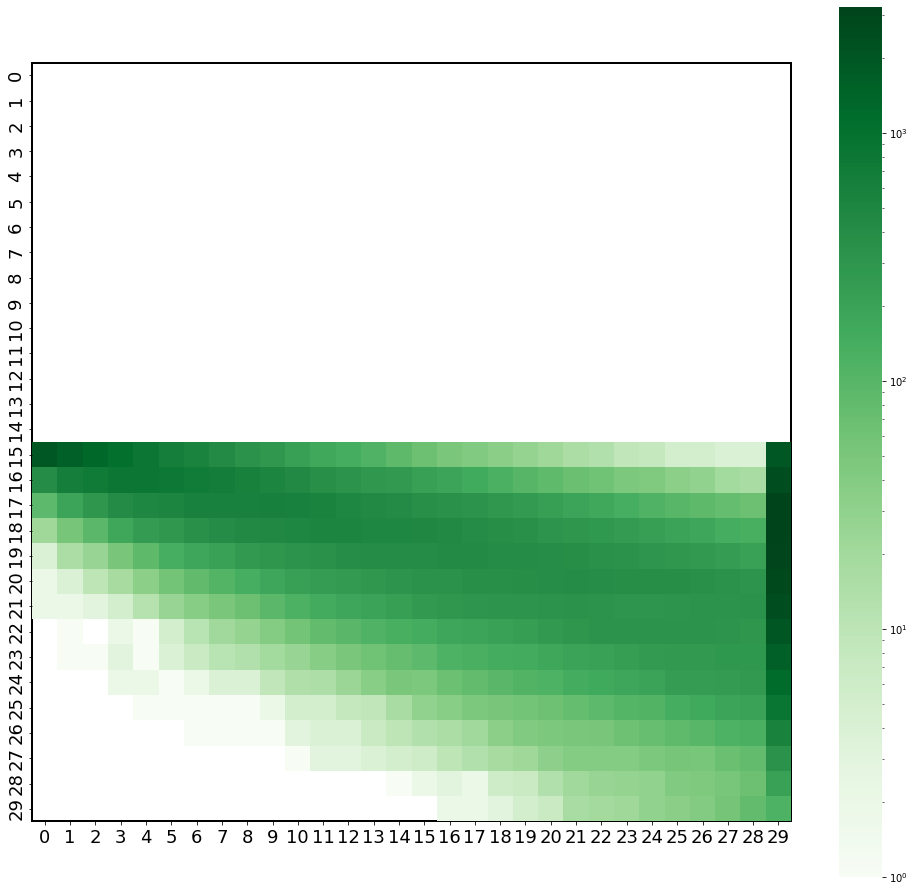

In [51]:
# plot number of visits in each state
plt.figure(figsize=(17,16))
ax = sns.heatmap(data[:,:], cmap = 'Greens', square=True, norm=mpl.colors.LogNorm(vmin=1, vmax=data.max()))#, annot=True,  annot_kws={"size": 5})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
#ax.xaxis.set_visible(False) 
#ax.yaxis.set_visible(False)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2')  
plt.savefig("safe_zone_policy_1_visit_new.png",dpi=600)

In [ ]:
data, ALL_SEN_TEST, cur_randomness = create_data(start_x, start_y, end_x, end_y, cur_randomness)

## Init Data Structure 

In [ ]:
# For each trajectory, number of new states, for W=[],it's simply number of states in the trajectory
def init_new_sen_counter():
    new_sen_counter = np.array(list(map(len, ALL_SEN)))
    return new_sen_counter
# E.g., new_sen_counter[2]

In [ ]:
MAX_LENGTH = max(init_new_sen_counter())

In [ ]:
# For each state, in which trajectories it is in 
ALL_WORDS = np.empty(TOTAL_NUMBER_WORDS, dtype=list)
for i in range(TOTAL_NUMBER_WORDS):
    ALL_WORDS[i] = []
for i, sen in enumerate(ALL_SEN):
    for word in sen: 
        ALL_WORDS[word].append(i)   # this will include repetitions, if ALL_SEN includes rep 
        
for i in range(TOTAL_NUMBER_WORDS):
    ALL_WORDS[i] = set(ALL_WORDS[i])
    
# E.g., ALL_WORDS[11]

### Greedy and Simulation algorithms 

In [ ]:
def greedy_algorithm(k):
    return np.argsort(np.array(list(map(len, ALL_WORDS))))[-k:]

# E.g., greedy_algorithm(10)

In [ ]:
def simulation_algorithm_one_run(k):
    # returns a set of size k 
    R = []
    a = np.arange(len(ALL_SEN))
    np.random.shuffle(a)
    for i,item in enumerate(a):
        for w in ALL_SEN[item]:
            R.append(w)
            R = list(set(R))
            if len(R) >= k:
                break
        if len(R) >= k:
            break
    return R

In [ ]:
def simulation_algorithm(k, rep):
    # preform rep times the simulation algorithm and take the best 
    print('simulation algorithm')
    S_opt = []
    wS_opt = 0
    all_in_S = np.zeros(rep)
    for i in range(rep):
        S = simulation_algorithm_one_run(k)
        all_in_S[i] = paths_all_in(S, ALL_SEN)
        if all_in_S[i] > wS_opt:
            S_opt = S
            wS_opt = all_in_S[i]
        if i % 10 == 0:
            print(i)
    return S_opt, all_in_S 

### Helpul functions

In [ ]:
def print_set(W, title_str):
    # print set W with title "title_str"
    A = np.zeros((N,N))
    for i in W:   
        x,y = VOCABULARY[i]
        A[x,y]=100
    ax = sns.heatmap(A,cbar=False)
    ax.set_title(title_str) 
# E.g., print_set(greedy_algorithm(40),'greedy')

In [ ]:
def paths_all_in(W, SEN):
    # how many trajectories in SEN are *all* in set W  
    counter = 0
    for sen in SEN:
        if set(sen) <= set(W):
            counter += 1
    return counter   

# E.g., paths_all_in([0,1])

## Safe Zone Algorithm  

In [ ]:
def safe_zone_one_run_faster(k):
    W = []
    new_sen_counter = init_new_sen_counter()
    i = 0
    
    while len(W) < k:
        val , e = np.unique(new_sen_counter, return_counts=True) 
        start = int(val[0] == 0)
        e_no_0 = e[start:]
        val_no_0 = val[start:]
        weight = e_no_0/val_no_0
        Z = sum(weight)        
        j = np.random.choice(val_no_0, p=weight/Z) 
        
        # Add a random path with j new values to W 
        a = np.where(new_sen_counter == j)[0]
        example_path_index = a[int(len(a) * random.random())] 
        new_words_before_W = ALL_SEN[example_path_index]
        
        new_words = []
        
        for w in new_words_before_W:
            if (w not in W) and (w not in new_words):
                 new_words.append(w)
            if len(new_words) + len(W) >= k: # if you want a set of size exactly k 
                break 
        
        W.extend(new_words)   # add new_words to the word list 
        W = list(set(W))
        
        # delete new_words from new_sen_counter
        for w in new_words: 
            for sen in ALL_WORDS[w]:
                if new_sen_counter[sen] <= 0:
                    print('NOOOO') # a sanity check - code should never be here
                    print('sen:',sen)
                new_sen_counter[sen] -= ALL_SEN[sen].count(w) 
                      
                
        i +=1 
     
    val , e = np.unique(new_sen_counter, return_counts=True)
    if val[0] == 0:
         return W, e[0]
    return W, 0
#E.g., safe_zone_one_run_faster(20)

In [ ]:
def safe_zone(k, rep):
    W_opt = []
    wW_opt = 0
    all_in_W = np.zeros(rep)
    for i in range(rep):
        W, all_in_W[i] = safe_zone_one_run_faster(k)
        if all_in_W[i] > wW_opt:
            W_opt = W
            wW_opt = all_in_W[i]
        if i % 10 == 0:
            print(i)
    W = W_opt
    return W, all_in_W 

## Run all algorithms several times

In [ ]:
def run_all_alg_several_times(k_values, times, rep):
    # for each k in k_values, for "times" times, run algorithms with "rep" repetitions
    m = len(k_values)
    results = np.zeros((m,times,4))
    
    for t in range(times):
        for i,k in enumerate(k_values):
            print(t, i, k)
            start = time.time()
            W, _ = safe_zone(k, rep)
            print('time:')
            print(time.time()-start)
            G = greedy_algorithm(len(W))
            S,_ = simulation_algorithm(len(W),rep)
            results[i,t,0] = len(W)
            results[i,t,1] = paths_all_in(W, ALL_SEN_TEST)/TOTAL_NUMBER_SEN*100
            results[i,t,2] = paths_all_in(G, ALL_SEN_TEST)/TOTAL_NUMBER_SEN*100
            results[i,t,3] = paths_all_in(S, ALL_SEN_TEST)/TOTAL_NUMBER_SEN*100
    return results

In [ ]:
times = 5
k_values = [40, 50, 60, 70, 80, 100, 120, 150, 200, 250, 300, 350]
rep = 300
many_results = run_all_alg_several_times(k_values, times, rep)

In [ ]:
# prepare data to print
df = pd.DataFrame(columns=['k','algorithm','value'])
for t in range(times):
    for i,k in enumerate(k_values):
        df = df.append({'k': many_results[i,t,0], 'algorithm':'safe zone', 'value': many_results[i,t,1]-many_results[i,t,2]}, ignore_index=True)
        df = df.append({'k': many_results[i,t,0], 'algorithm':'greedy', 'value': many_results[i,t,2]-many_results[i,t,2]}, ignore_index=True)
        df = df.append({'k': many_results[i,t,0], 'algorithm':'simulation', 'value': many_results[i,t,3]-many_results[i,t,2]}, ignore_index=True)

print(df)

In [ ]:
sns.lineplot(data=df, x='k', y='value', hue_order = ['safe zone','simulation','greedy'], hue='algorithm', palette="pastel")
plt.xlabel('k')
plt.ylabel('coverage percentage\n compared to greedy')
plt.savefig("safe_zone_result_coverage_compared_to_greedy.png", dpi=600)

In [ ]:
df2 = pd.DataFrame(columns=['k','algorithm','value'])
for t in range(times):
    for i,k in enumerate(k_values):
        df2 = df2.append({'k': many_results[i,t,0], 'algorithm':'safe zone', 'value': many_results[i,t,1]}, ignore_index=True)
        df2 = df2.append({'k': many_results[i,t,0], 'algorithm':'greedy', 'value': many_results[i,t,2]}, ignore_index=True)
        df2 = df2.append({'k': many_results[i,t,0], 'algorithm':'simulation', 'value': many_results[i,t,3]}, ignore_index=True)

print(df2)

In [ ]:
sns.lineplot(data=df2, x='k', y='value', hue_order = ['safe zone','simulation','greedy'], hue='algorithm', palette="pastel")
plt.xlabel('k')
plt.ylabel('coverage percentage')
plt.savefig("safe_zone_result_coverage_all.png", dpi=600)

In [ ]:
df3 = pd.DataFrame(columns=['k','algorithm','value'])
for t in range(times):
    for i,k in enumerate(k_values[:8]):
        df3 = df3.append({'k': many_results[i,t,0], 'algorithm':'safe zone', 'value': many_results[i,t,1]}, ignore_index=True)
        df3 = df3.append({'k': many_results[i,t,0], 'algorithm':'greedy', 'value': many_results[i,t,2]}, ignore_index=True)
        df3 = df3.append({'k': many_results[i,t,0], 'algorithm':'simulation', 'value': many_results[i,t,3]}, ignore_index=True)

In [ ]:
sns.lineplot(data=df3, x='k', y='value', hue_order = ['safe zone','simulation','greedy'], hue='algorithm', palette="pastel")
plt.xlabel('k')
plt.ylabel('coverage percentage')
plt.savefig("safe_zone_result_coverage_partial.png", dpi=600)

## Second policy  

In [ ]:
def create_data_policy_two(start_x, start_y, end_x, end_y, cur_randomness):
    data = np.zeros((N, N))
    ALL_SEN = np.empty(TOTAL_NUMBER_SEN, dtype=list)

    for i in range(TOTAL_NUMBER_SEN):
        print("%d/%d" % (i, TOTAL_NUMBER_SEN))
        ALL_SEN[i] = []
        t = 0 
        cur_x = start_x
        cur_y = start_y
        data[cur_x, cur_y] += 1
        ALL_SEN[i].append(VOCABULARY_MAP[(cur_x,cur_y)])
        while (cur_x != end_x or cur_y != end_y) and t < H-1:
            t+=1
            if cur_x != end_x:
                if cur_x > end_x:
                    cur_x, cur_y, cur_randomness = go_left(cur_x,cur_y, cur_randomness)
                else:
                    cur_x, cur_y, cur_randomness = go_right(cur_x,cur_y, cur_randomness)
            else:
                cur_x, cur_y, cur_randomness = go_up(cur_x,cur_y,start_x, cur_randomness)

            data[cur_x, cur_y] += 1
            ALL_SEN[i].append(VOCABULARY_MAP[(cur_x,cur_y)])
    return data, ALL_SEN, cur_randomness

In [ ]:
data_2, ALL_SEN_2, cur_randomness = create_data_policy_two(start_x, start_y, end_x, end_y, cur_randomness)

In [ ]:
sns.set_theme()
plt.figure(figsize=(12,12))
ax = sns.heatmap(data_2[:,:])#, annot=True,  annot_kws={"size": 5})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.savefig("safe_zone_intro_maze_visit_second_policy.png",dpi=600)
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
plt.savefig("safe_zone_policy_2_visit.png",dpi=600)

# Delete all below 

In [ ]:
ax.annotate("", xy=(0.5, 0.5), xytext=(0, 0), arrowprops=dict(arrowstyle="->"))

### Plot two policies

In [ ]:
df.loc[((df2['algorithm'] == 'greedy') | (df2['algorithm'] == 'simulation') | (df2['algorithm'] == 'safe zone')) & (df2['k'] == 300)]

In [ ]:
df2.loc[((df2['algorithm'] == 'greedy') | (df2['algorithm'] == 'simulation') | (df2['algorithm'] == 'safe zone')) & (df2['k'] == 250)]

In [ ]:
#df.rename(columns={"Aalg": "algorithm""})
df2 = pd.DataFrame(columns=['k','algorithm','value'])
for t in range(times):
    for i,k in enumerate([40, 50, 60, 70, 80, 100]):
        df2 = df2.append({'k': many_results[i,t,0], 'algorithm':'safe zone', 'value': many_results[i,t,1]}, ignore_index=True)
        df2 = df2.append({'k': many_results[i,t,0], 'algorithm':'greedy', 'value': many_results[i,t,2]}, ignore_index=True)
        df2 = df2.append({'k': many_results[i,t,0], 'algorithm':'simulation', 'value': many_results[i,t,3]}, ignore_index=True)


sns.lineplot(data=df2, x='k', y='value', hue_order = ['safe zone','simulation','greedy'], hue='algorithm', palette="pastel")
plt.xlabel('k')
plt.ylabel('coverage percentage')
#plt.legend(['safe zone algorithm', 'greedy algorithm', 'simulation algorithm'])
plt.savefig("safe_zone_result_coverage_partial.png", dpi=600)

In [ ]:
# Run algorithms for several k's
k_values = [20,40,80,160]
k_values = [20,160]
k_values = [20,300]
k_values = [20, 160, 2700, 3600, 7200, 8100]
k_values = [20, 160, 2700, 3600]
k_values = [60,7200, 8100]
k_values = [60, 10100]
k_values = [20, 160, 2700, 3600, 7200, 8100, 10100, 10400, 11000]
k_values = [20, 160, 2700, 3600, 7200, 8100]
k_values = [20, 160, 200]#, 250]
#k_values = [40, 50, 60, 70, 80, 100, 120, 150, 200, 250, 300, 350, 400]

k_values = [55]
rep = 300
#rep = 100 
rep=10

m = len(k_values)
results_std = np.zeros((m,rep))
results = np.zeros((m,4)) 
results_hist_covered = np.zeros((m,MAX_LENGTH-1))
results_each_word_cover_number_paths = np.empty((m,),dtype=object)
results_set_W = np.empty((m,),dtype=object)
results_set_G = np.empty((m,),dtype=object)
results_set_S = np.empty((m,),dtype=object)



for i,k in enumerate(k_values):
    print(i, k)
    start = time.time()
    W, results_std[i,:] = safe_zone(k, rep)
    
    # post processing
    # histogram of sentences lengths, for coverd paths
    hist, bins = np.histogram(paths_covered_lengths(W),np.arange(MAX_LENGTH+1)-0.1)
    results_hist_covered[i] = hist[1:]
    
    results_each_word_cover_number_paths[i] = each_word_cover_number_paths(W)
    
    print('time:')
    print(time.time()-start)
    
    G = greedy_algorithm(len(W))
    print(len(G))
    S,a = simulation_algorithm(len(W),rep)
    print(len(S))
    print('len W: %d' %len(W))
    results[i,0] = len(W)
    results[i,1] = paths_all_in(W, ALL_SEN_TEST)/TOTAL_NUMBER_SEN*100
    results[i,2] = paths_all_in(G, ALL_SEN_TEST)/TOTAL_NUMBER_SEN*100
    results[i,3] = paths_all_in(S, ALL_SEN_TEST)/TOTAL_NUMBER_SEN*100
    
    results_set_W[i] = W
    results_set_G[i] = G
    results_set_S[i] = S

In [ ]:
df.loc[(df['algorithm'] == 'greedy') & (df['k'] == 300)]

In [ ]:
G = results_set_G[0]
print_set(G,'greedy ' + str(len(G)))
plt.savefig("greedy_example.png", dpi=600)

In [ ]:
W = results_set_W[0]
print_set(W,'Safe-ZONE ' + str(len(W)))
plt.savefig("safe_zone_example.png", dpi=600)

In [ ]:
S = results_set_S[0]
print_set(S,'Simulation ' + str(len(S)))
plt.savefig("simulation_example.png", dpi=600)

In [ ]:
# A = np.zeros((N,N))
# #for i in ALL_SEN[8]:#[779, 809, 689, 566, 568, 451, 452, 454, 456, 457, 458, 459, 599, 869, 497, 498, 499, 629, 502, 503]:
# for i in greedy_algorithm(20):   
#     x,y = VOCABULARY[i]
#     A[x,y]=1
# sns.heatmap(A, annot=True)
# paths_all_in(greedy_algorithm(20))

In [ ]:
results[:,1]

In [ ]:
# post-processing
def path_len_if_in_set(p,W):
    # returns length of p if p in W, o.w. 0
    return len(set(p)) * (set(p) <= set(W)) # "set(p)" to avoid repetitions 

def paths_covered_lengths(W):
    # returns lengths of all covered paths  
    return np.array([path_len_if_in_set(p,W) for p in ALL_SEN])

def each_word_cover_number_paths(W):
    all_covered_sen = [] # a list of all covered sentences
    for i, p in enumerate(ALL_SEN): 
        if set(p) <= set(W):
            all_covered_sen.append(i)
    
    #print(all_covered_sen)

    answer = [] 
    for i in W: # for each word in the set how many sentences does it cover
        s = set(ALL_WORDS[i]).intersection(all_covered_sen)
        if len(s) > 0:
            answer.append(len(s))
    return answer

In [ ]:
results[:,1]-results[:,3]

In [ ]:
#results = np.load('shakespeare_results.npy')
sns.lineplot(x=results[:,0], y=results[:,1])
sns.lineplot(x=results[:,0], y=results[:,2])
sns.lineplot(x=results[:,0], y=results[:,3])


# plt.plot(results[:,0], results[:,1])
# plt.plot(results[:,0], results[:,2])
# plt.plot(results[:,0], results[:,3])
#plt.scatter(np.repeat(k_values,rep),results_std/len(split_it)*100,s=0.2)
plt.xlabel('k')
plt.ylabel('coverage percentage')
plt.legend(['safe zone algorithm', 'greedy algorithm', 'simulation algorithm'])


In [ ]:
print(results[:,0])
print(results[:,1])
print(results[:,2])
print(results[:,3])

In [ ]:
#results = np.load('shakespeare_results.npy')
plt.plot(results[:,0], results[:,1])
plt.plot(results[:,0], results[:,2])
plt.plot(results[:,0], results[:,3])
#plt.scatter(np.repeat(k_values,rep),results_std/len(split_it)*100,s=0.2)
plt.xlabel('k')
plt.ylabel('coverage percentage')
plt.legend(['safe zone algorithm', 'greedy algorithm', 'simulation algorithm'])

In [ ]:
print(results[:,0])
print(results[:,1])
print(results[:,2])
print(results[:,3])

In [ ]:
#results = np.load('shakespeare_results.npy')
plt.plot(results[:,0], results[:,1])
plt.plot(results[:,0], results[:,2])
plt.plot(results[:,0], results[:,3])
#plt.scatter(np.repeat(k_values,rep),results_std/len(split_it)*100,s=0.2)
plt.xlabel('k')
plt.ylabel('coverage percentage')
plt.legend(['safe zone algorithm', 'greedy algorithm', 'simulation algorithm'])

In [ ]:
plt.plot(results[:,0], results[:,1])
plt.plot(results[:,0], results[:,2])
plt.plot(results[:,0], results[:,3])
#plt.scatter(np.repeat(k_values,rep),results_std/len(split_it)*100,s=0.2)
plt.xlabel('k')
plt.ylabel('coverage percentage')
plt.legend(['safe zone algorithm', 'greedy algorithm', 'simulation algorithm'])

In [ ]:
len(ALL_WORDS)

In [ ]:
plt.plot(results[:,0], results[:,1])
plt.plot(results[:,0], results[:,2])
plt.plot(results[:,0], results[:,3])
#plt.scatter(np.repeat(k_values,rep),results_std/len(split_it)*100,s=0.2)
plt.xlabel('k')
plt.ylabel('coverage percentage')
plt.legend(['safe zone algorithm', 'greedy algorithm', 'simulation algorithm'])

In [ ]:
for i,k in enumerate(k_values):
    plt.title('k=' + str(k))
    plt.ylabel('number of covered sentences with given lengths')
    max_index_nonzero = max(np.nonzero(results_hist_covered[i,:])[0])
    plt.bar(np.arange(1,max_index_nonzero+2), results_hist_covered[i,:][:max_index_nonzero+1])
    plt.show()


# # lengths of covered sentences
# plt.title('k=20')
# plt.ylabel('number of covered sentences with given lengths')
# plt.bar([1,2,3,4,5,6,7,8],[1157,   13,    0,    6,    2,    0,    0,    1])
# #plt.bar([1157,   13,    0,    6,    2,    0,    0,    1])

In [ ]:
plt.title('k=40')
plt.bar([1,2,3,4,5,6,7,8,9],[693,  84,  29,  12,   2,   0,   1,   2,   2])
plt.ylabel('number of covered sentences with given lengths')
plt.show()

In [ ]:
plt.title('k=160')
plt.bar([1,2,3,4,5,6,7,8,9,10,11],[1494,  245,  199,  186,   42,   30,   11,    8,    7,    2,    2] )
plt.ylabel('number of covered sentences with given lengths')
plt.show()

# Read Data

In [ ]:
data = pd.read_csv('cbt_valid.txt',sep="\n", header=None, on_bad_lines='skip')

data.info()
len(data)
# for i in range(10):
#    print(data['PlayerLine'].iloc[i])

In [ ]:
data.head()

In [ ]:
# Take only part of the data 
#data = data.sample(frac=0.20)

In [ ]:
#data['PlayerLine'].apply(lambda x: x if x not in stop else '')
#data['PlayerLine'].str.replace('[!,.,-:\'^\w\s]','')
data[data.columns[0]] = data[data.columns[0]].str.replace('[{}]'.format(string.punctuation), '')
data[data.columns[0]] = data[data.columns[0]].str.lower()
data

In [ ]:
split_it = data[data.columns[0]].str.split()
split_it

In [ ]:
# Total # words:
VOCABULARY = split_it.explode().unique()
VOCABULARY_MAP = dict((y,x) for x,y in enumerate(VOCABULARY))
TOTAL_NUMBER_WORDS = len(VOCABULARY) #len(split_it.explode().value_counts())

In [ ]:
TOTAL_NUMBER_SEN = len(split_it)
VOCABULARY[0]
VOCABULARY.shape

In [ ]:
max(np.nonzero([1157,   13,    0,    6,    2,    0,    0,    0,0])[0])

In [ ]:
# For each sentence, the words it contains
ALL_SEN = np.empty(TOTAL_NUMBER_SEN, dtype=list)
for i,sen in enumerate(split_it):
    ALL_SEN[i] = []
    for word in sen:
        ALL_SEN[i].append(VOCABULARY_MAP[word]) # Now there is a repetition, e.g.,  ALL_SEN[2] and word 11 
        #ALL_SEN[i] = list(set(ALL_SEN[i])) # remove repetitions
# E.g., 
ALL_SEN[2]
TOTAL_NUMBER_SEN = ALL_SEN.shape[0]

In [ ]:
plt.errorbar(k_values, np.mean(results_std/len(split_it)*100,1), np.std(results_std/len(split_it)*100,1),label='std')
plt.plot(k_values,np.max(results_std/len(split_it)*100,1),c='r',label='max')
plt.scatter(np.repeat(k_values,rep),results_std/len(split_it)*100,s=0.2)
plt.legend()

In [ ]:
results[:,1]

In [ ]:
np.repeat(k_values,8)

## Statistics on the data 

In [ ]:
new_sen_counter = init_new_sen_counter()
new_sen_counter.shape
a = np.zeros(164)
for i in range(164):
    a[i] = len(np.where(new_sen_counter==i)[0])
    #print(i, a[i])
plt.bar(np.arange(30),a[:30])
plt.xlabel('sentence length')
plt.ylabel('number of sentences')

In [ ]:
    word_degree = np.array(list(map(len, ALL_WORDS))) 
    max_deg = max(word_degree)
    hist_word_degree = np.zeros(max_deg+1, dtype=int)

    print(max_deg)
#print(word_degree)

for i in range(max_deg+1):
    hist_word_degree[i] = len(np.where(word_degree==i)[0])

In [ ]:
l = 60
print(hist_word_degree[:l])
print(sum(hist_word_degree))

In [ ]:
fig, ax = plt.subplots()
plt.bar(np.arange(l), hist_word_degree[:l])
#plt.bar(np.arange(1,20), b[1:20])
#ax.set_xticks(np.arange(1,20))
#ax.set_xticklabels(np.arange(1,20))
plt.xlabel('degree')
plt.ylabel('number of words with this degree')
plt.show()

In [ ]:
sen_with_words_degree_1 = ALL_WORDS[np.where(word_degree==1)[0]]
(unique, counts) = np.unique(sen_with_words_degree_1, return_counts=True)
hist_words_degree_1 = np.zeros(max(counts)+2, dtype=int)
for i in range(max(counts)+1):
    hist_words_degree_1[i] = len(np.where(counts==i)[0])
    print(i)

In [ ]:
        fig, ax = plt.subplots()
        plt.bar(np.arange(max(counts)+2), hist_words_degree_1)
        #plt.bar(np.arange(1,20), b[1:20])
        #ax.set_xticks(np.arange(1,20))
        #ax.set_xticklabels(np.arange(1,20))
        #plt.xlabel('degree')
#plt.ylabel('number of words with this degree')
plt.show()

## Greedy algorithm

In [ ]:
plt.plot(p_range,wG_result/len(split_it)*100)
plt.ylabel('percentage covered by greedy')
plt.xlabel('k = percentage from total number of words')
plt.show()

In [ ]:
plt.plot(p_range,wG_result/len(split_it)*100)
plt.ylabel('percentage covered by greedy')
plt.xlabel('k = percentage from total number of words')
plt.show()

In [ ]:
20/len(split_it)*100

In [ ]:
#ALL_WORDS[np.where(word_degree==1)[0]]
#print(ALL_WORDS)
print(hist_words_degree_1)
print(sum(hist_words_degree_1))
print(len(np.where(word_degree==1)[0]))
print(len(sen_with_words_degree_1))
sum(counts)

In [ ]:
np.unique(counts)
10332 + 715*2 + 85*3 + 14*4 + 5 * 5 +1*6 

### Greedy 

In [ ]:
percentages = [1, 5, 15, 20, 30, 40]
result = np.zeros(len(percentages))
for i, per in enumerate(percentages):
    print(per)
    G = greedy_algorithm(int(TOTAL_NUMBER_WORDS*per/100))
    result[i] = paths_all_in(G)/TOTAL_NUMBER_SEN * 100 

In [ ]:
plt.plot(percentages, result)
plt.scatter(percentages, result)
plt.xlabel('percentage of total number of words')
plt.ylabel('percentage of covered sentences')
plt.show()

# ----------------- old ------------------

In [ ]:
# Input: a set of words W, a path p
# Output: how many words in p are not in W

def new_states(W,p):
    return len([x for x in p if x not in W])

#Example: new_states(['act', 'london', 'i', 'so'],split_it[3])

In [ ]:
# Input: set of words W, set of paths ps
# Output: 
# dataframe
# index: # new states () 
# value: for i index, how many paths has exactly i states not in W 
# o = estimate(W,ps)
# o.get(i,0)

def estimate(W,ps):
    return ps.apply(lambda p: new_states(W,p)).value_counts()#.sort_index() #no need ".sort_index()" 

# Results: many k's 

## ==================================

In [ ]:
W, all_sen = safe_zone_one_run_faster(split_it, 50)

In [ ]:
#p_n = np.sum(ALL_SEN,axis=1)
#b, e = np.unique(p_n,return_counts=True)
#print(ALL_SEN[73043,:].nonzero()[1])
W.sort()
print(W)

In [ ]:
a = estimate([],split_it)
type(a)

In [ ]:

all_sen = ALL_SEN.copy()

In [ ]:
np.where(all_sen[:,0]==1)
#

In [ ]:
c = split_it.apply(lambda p: new_states([],p))
#35 in c.values
35.0 in p_n

In [ ]:
int(False)

# New algorithm 

In [ ]:
H = max(split_it.apply(len))

## Pandas Implementation

In [ ]:
# Input: set of words W, set of paths ps, index j
# Output: path in p with "new_states(W,p)=j"
def random_path(W,ps,j):
    e = ps.apply(lambda p: new_states(W,p))
    return ps.iloc[e[e.index[e == j]].sample().index[0]]

In [ ]:
def new_state_per_path(W,ps):
    return ps.apply(lambda p: new_states(W,p))

In [ ]:

# e = split_it.apply(lambda p: new_states(W,p))
# print()
# e[75492]
new_state_per_path(W,split_it)
#print(random_path(W,split_it,1))
#print(W)

In [ ]:
e1 = estimate(W,split_it)
e2 = estimate(W,split_it)

In [ ]:
e3 = e2.drop([0], errors='ignore')
print(len(e3))
sum(e3.values/e3.keys())

In [ ]:
# main algorithm without repetitions 
def safe_zone_one_run(split_it, k):
    #split_it_random = shuffle(split_it)
    W = []

    while len(W) < k:
        e = estimate(W,split_it)
        e_no_0 = e.drop([0], errors='ignore')
        w = e_no_0.values/e_no_0.keys()
        Z = sum(w)
        j = np.random.choice(e_no_0.keys(), p=w/Z)
        example_path = random_path(W,split_it,j)
        W.extend(example_path)
        W = list(set(W))
        
    return W

In [ ]:
# def safe_zone_one_run_faster(split_it, k):
#     #split_it_random = shuffle(split_it)
#     W = []
#     all_sen = np.copy(ALL_SEN) #1 if a word in a sentence is not in W, for W=[] it's ALL_SEN
    
#     while len(W) < k:
#         print('hello')
#         print(W)
#         p_n = np.sum(all_sen, axis=1)
#         val , e = np.unique(p_n, return_counts=True)
#         start = int(val[0] == 0)
#         e_no_0 = e[start:]
#         val_no_0 = val[start:]
#         #e_no_0 = e.drop([0], errors='ignore')
#         #w = e_no_0.values/e_no_0.keys()
#         weight = e_no_0/val_no_0
#         Z = sum(weight)
#         #j = np.random.choice(e_no_0.keys(), p=w/Z) 
#         j = np.random.choice(val_no_0, p=weight/Z) 
#         #example_path = split_it.iloc[p_n[p_n.index[p_n == j]].sample().index[0]]
#         a = np.where(p_n == j)[0]
#         example_path_index = a[int(len(a) * random.random())]
#         new_words = np.where(all_sen[example_path_index,:] == 1)[0]
#         all_sen[:,new_words] = 0
        
#         #W = list(set(W))
 
#         W.extend(new_words)

#     return W, all_sen

In [ ]:
#%time a = np.zeros((len(split_it),TOTAL_NUMBER_WORDS)); print(a.shape)
#%time 
safe_zone_one_run_faster(split_it, 30)

In [ ]:
# amplification
def safe_zone(split_it, k, rep):
    W_opt = []
    wW_opt = 0
    all_in_W = np.zeros(rep)
    for i in range(rep):
        #W = safe_zone_one_run(split_it, k)
        W,all_sen = safe_zone_one_run_faster(split_it, k)
        p_n = np.sum(all_sen,axis=1)
        
        # These are the usual ipython objects, including this one you are creating
        ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars', 'np', 'nx', 'plt', 'sns', 'pd', 'shuffle']

        # Get a sorted list of the objects and their sizes
        print(sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True))


        
        #del all_sen
        #gc.collect()
        
        
        
        val , wW = np.unique(p_n, return_counts=True)
        
        #wW = estimate(W,split_it)
        all_in_W[i] = wW[0] 
        if all_in_W[i] > wW_opt:
            W_opt = W
            wW_opt = all_in_W[i]
        print(i)
    W = W_opt
    return W,all_in_W 

# Results: example

In [ ]:
k = 40
W, _ = safe_zone(split_it, k, rep=10)

In [ ]:
k = len(W)
G = greedy_algorithm(split_it, k)

In [ ]:
print('Intersection percentage')
len(set(W).intersection(set(G)))/k

In [ ]:
# what is the reward 
wW, _ = estimate(W,split_it)
wG, _ = estimate(G,split_it)
print('Percentage of paths completely in W')
print(wW[0]/len(split_it)*100)
print('Percentage of paths completely in greedy')
print(wG[0]/len(split_it)*100)

In [ ]:
# Not in greedy (not in intersection)
list(set(W) - set(G))

In [ ]:
# intersection
list(set(W).intersection(set(G)))

In [ ]:
# sentences fully in G
for item in split_it:
    if new_states(G,item) == 0:
        print(item)

In [ ]:
%load_ext line_profiler

In [ ]:
#%lprun -f safe_zone_one_run_faster safe_zone(split_it, H, 160, 10) 
%lprun -f safe_zone_one_run_faster safe_zone_one_run_faster(split_it, 10)

## New algorithm variation between different runs 

In [ ]:
split_it.value_counts()

In [ ]:
wG_result/len(split_it)*100

In [ ]:
import time
start = time.time()

time.sleep(10)  # or do something more productive

done = time.time()
elapsed = done - start
print(elapsed)

In [ ]:
# Improving running time (rep=10)
# Before improvement
# One run of function "safe_zone"
# k=20 time: 25.265331983566284 sec
# k=40 time: 61.24029278755188
# k=80 time: 124.65231394767761
# k=160 time: 442.3787660598755

# Pandas implementation (in parenthesis: second attempt)
# # k=20 time: 29.19920802116394 sec (24.763505935668945)
# k=40 time: 63.39365196228027 (62.1926052570343)
# k=80 time: 200.5077781677246 (200.3696939945221)
# k=160 time: 789.925961971283 (1093.477390050888)

# Pandas implementation 2 - estimate_and_example_combined
# k=20 time: 13.281445741653442
# k=40 time: 36.58569073677063
# k=80 time: 102.52371382713318 
# k=160 time: 434.51500725746155

# Numpy implementation 
# k=20 time: 127.39857602119446
# k=40 time: 245.5109419822693
# k=80 time: 499.67855072021484
# k=160 time: 



In [ ]:
split_it.shape

In [ ]:
split_it[1]

In [ ]:
type(split_it)

In [ ]:
# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars', 'np', 'nx', 'plt', 'sns', 'pd', 'shuffle']

# Get a sorted list of the objects and their sizes
print(sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True))


In [ ]:
np.sum(ALL_SEN)

In [ ]:
ALL_SEN.shape

In [ ]:
787862/(111396*27382)

In [ ]:
from platform import python_version

print(python_version())

In [ ]:
np.array(k_values)/TOTAL_NUMBER_WORDS

In [ ]:
plt.plot(results[:,1]/(np.array(k_values)/TOTAL_NUMBER_WORDS))

In [ ]:
plt.plot(results[:,2]/(np.array(k_values)/TOTAL_NUMBER_WORDS))

In [ ]:
# Plot of theory results

In [ ]:
delta = 0.3 
k = 50
H = 45

In [ ]:
plt.scatter([delta],[k],label='OPT', color="#003f5c")
plt.scatter([delta*H],[k],label='Greedy Algorithm', color="#7a5195")
alphas = np.arange(2, int(k/delta)/3.5, 2)
#plt.plot((1+alphas)*delta, k*H/(delta*alphas), label='High Probability State')
plt.plot((1+alphas)*delta, k + k*H/alphas*np.log(k/0.05), label='Simulation Algorithm', color="#ef5675")
plt.scatter([2*delta],[11*k],label='Safe Zone Algorithm', color = "#ffa600")

plt.text(delta-0.3, -1000, '$\delta$', fontsize=12)
plt.text(-0.75, k, '$k$', fontsize=12)
plt.text(-1, 11*k, '$11k$', fontsize=12)
plt.text(2*delta, -1000, '$2\delta$', fontsize=12)
plt.text(H*delta-0.3, -1000, '$\delta H$', fontsize=12)


plt.xlabel('$\delta$-values', fontsize=18)
plt.ylabel('$k$-values', fontsize=18)
plt.tick_params(left = False, top = False, 
                right = False , labelleft = False , labelright = False, 
                labelbottom = False, bottom = False)
plt.legend(fontsize=14)
print((1+alphas)*delta)
plt.savefig("safe_zone_intro_summary_result.png",dpi=600)

In [ ]:
!pip install pygame
import pygame

color1 = pygame.Color("#003f5c")
color2 = pygame.Color("#58508d")
color3 = pygame.Color("#bc5090")
color4 = pygame.Color("#ff6361")
color5 = pygame.Color("#ffa600")








#screen.fill(blue)